In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
data=pd.read_csv("heart.csv")
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
info

['age',
 '1: male, 0: female',
 'chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic',
 'resting blood pressure',
 ' serum cholestoral in mg/dl',
 'fasting blood sugar > 120 mg/dl',
 'resting electrocardiographic results (values 0,1,2)',
 ' maximum heart rate achieved',
 'exercise induced angina',
 'oldpeak = ST depression induced by exercise relative to rest',
 'the slope of the peak exercise ST segment',
 'number of major vessels (0-3) colored by flourosopy',
 'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect']

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### check for the irregularities in data

In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### No Null values present

<Axes: >

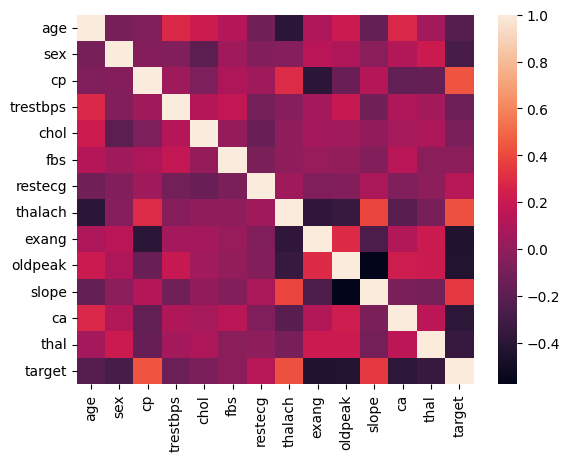

In [7]:
sns.heatmap(data=data.corr())

In [8]:
data.corr()['target'].abs().sort_values()

fbs         0.028046
chol        0.085239
restecg     0.137230
trestbps    0.144931
age         0.225439
sex         0.280937
thal        0.344029
slope       0.345877
ca          0.391724
thalach     0.421741
oldpeak     0.430696
cp          0.433798
exang       0.436757
target      1.000000
Name: target, dtype: float64

###  fbs has low correlation with the target

In [9]:
data['target'].unique()

array([1, 0])

### 0 mean No heart disease detected 1 means disease detected

<Axes: ylabel='count'>

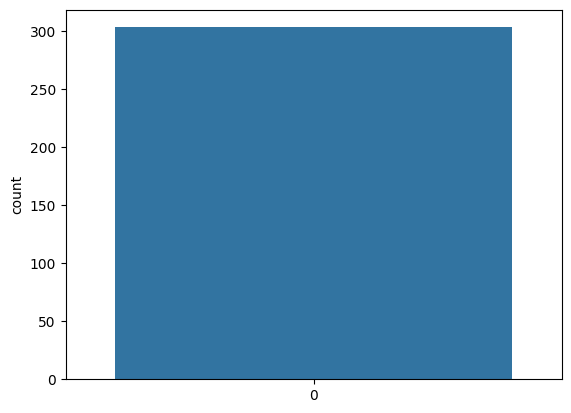

In [10]:
target=data['target']
sns.countplot(target)

In [11]:
data['sex'].unique()

array([1, 0])

### Assuming 1 is male and 0 is female

### Females are more likely to have a heart related problem according to the data given

### people with typical angina are less likely to have a heart related problem

In [14]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Splitting the Data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
Symptoms=data.drop("target",axis=1)
Predictions=data["target"]

In [20]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(Symptoms,Predictions,test_size=0.2,random_state=0)

In [21]:
Xtrain.shape

(242, 13)

In [22]:
Ytrain.shape

(242,)

In [23]:
Xtest.shape

(61, 13)

In [24]:
Ytest.shape

(61,)

### Model Selection


In [25]:
from sklearn.metrics import accuracy_score,f1_score

### SVM

In [26]:
from sklearn import svm
sv=svm.SVC(kernel='linear')
sv.fit(Xtrain,Ytrain)

SVC(kernel='linear')

In [27]:
print("F1 Score")
print(f1_score(sv.predict(Xtest),Ytest))
print("Accuracy Score")
print(accuracy_score(sv.predict(Xtest),Ytest))

F1 Score
0.8450704225352113
Accuracy Score
0.819672131147541


### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
DS=DecisionTreeClassifier(random_state=0)
DS.fit(Xtrain,Ytrain)

DecisionTreeClassifier(random_state=0)

In [30]:
print("F1 Score")
print(f1_score(DS.predict(Xtest),Ytest))
print("Accuracy Score")
print(accuracy_score(DS.predict(Xtest),Ytest))

F1 Score
0.8
Accuracy Score
0.7868852459016393


### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=0)
RF.fit(Xtrain,Ytrain)

RandomForestClassifier(random_state=0)

In [32]:
print("F1 Score")
print(f1_score(RF.predict(Xtest),Ytest))
print("Accuracy Score")
print(accuracy_score(RF.predict(Xtest),Ytest))

F1 Score
0.8955223880597015
Accuracy Score
0.8852459016393442


### KNN


In [33]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=16)
KNN.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=16)

In [34]:
print("F1 Score")
print(f1_score(KNN.predict(Xtest),Ytest))
print("Accuracy Score")
print(accuracy_score(KNN.predict(Xtest),Ytest))

F1 Score
0.6666666666666666
Accuracy Score
0.6721311475409836


In [47]:
!pip install joblib


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.


In [48]:
import joblib

# Assuming your model is named 'RF'
joblib.dump(RF, 'RF.joblib')


['RF.joblib']